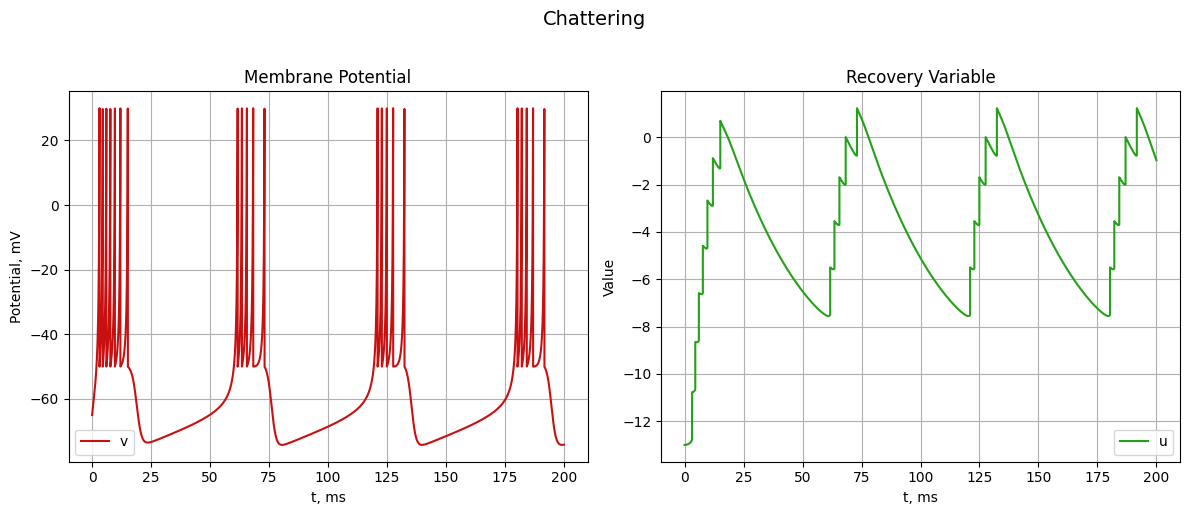

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from typing import Tuple, Dict

# Regular spiking
regular_spiking_params = {
    'a': 0.02,
    'b': 0.2,
    'c': -65,
    'd': 8,
    'v0': -65,
    'I': 10,
    'tt': 'Regular spiking'
}

# Fast spiking
fast_spiking_params = {
    'a': 0.1,
    'b': 0.2,
    'c': -65,
    'd': 2,
    'v0': -70,
    'I': 15,
    'tt': 'Fast spiking'
}

# Low-threshold spiking
low_threshold_spiking_params = {
    'a': 0.02,
    'b': 0.25,
    'c': -65,
    'd': 2,
    'v0': -70,
    'I': 7,
    'tt': 'Low-threshold spiking'
}

# Resonator
resonator_params = {
    'a': 0.1,
    'b': 0.26,
    'c': -65,
    'd': 2,
    'v0': -65,
    'I': 10,
    'tt': 'Resonator'
}

# Intrinsically bursting
intrinsically_bursting_params = {
    'a': 0.02,
    'b': 0.2,
    'c': -55,
    'd': 4,
    'v0': -60,
    'I': 10,
    'tt': 'Intrinsically bursting'
}

# Chattering
chattering_params = {
    'a': 0.02,
    'b': 0.2,
    'c': -50,
    'd': 2,
    'v0': -65,
    'I': 10,
    'tt': 'Chattering'
}

#  Izhikevich model
def izhikevich_model(state, t, params):
    v, u = state
    a, b, I = params['a'], params['b'], params['I']

    dvdt = 0.04 * v**2 + 5 * v + 140 - u + I
    dudt = a * (b * v - u)
    return [dvdt, dudt]


def simulate_izhikevich(params, t_max=200, dt=0.001):

    a, b, c, d = params['a'], params['b'], params['c'], params['d']
    v0, u0 = params['v0'], params['b'] * params['v0']
    I = params['I']

    t = np.arange(0, t_max, dt)
    n_steps = len(t)

    v = np.zeros(n_steps)
    u = np.zeros(n_steps)
    v[0], u[0] = v0, u0

    #  Integration
    for i in range(1, n_steps):
        state = [v[i-1], u[i-1]]
        new_state = odeint(izhikevich_model, state, [0, dt], args=(params,))[1]

        v[i], u[i] = new_state

        #  After-spike resetting
        if v[i] >= 30:
            v[i] = c
            u[i] += d

    return t, v, u

#  Start of the simulation
t, v, u = simulate_izhikevich(chattering_params)

#  Graphics
DARK_RED = '#c91010'
DARK_GREEN = '#23a118'

plt.figure(figsize=(12, 5))
plt.suptitle(chattering_params['tt'], fontsize=14, y=1.02)

plt.subplot(1, 2, 1)
plt.plot(t, v, color=DARK_RED)
plt.title('Membrane Potential')
plt.legend('v(t)')
plt.xlabel('t, ms')
plt.ylabel('Potential, mV')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, u, color=DARK_GREEN)
plt.title('Recovery Variable')
plt.legend('u(t)')
plt.xlabel('t, ms')
plt.ylabel('Value')
plt.grid(True)

plt.tight_layout()
plt.savefig('chattering.png', dpi=300, bbox_inches='tight')
plt.show()

#  Saving the results
#from google.colab import files
#files.download('chattering.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

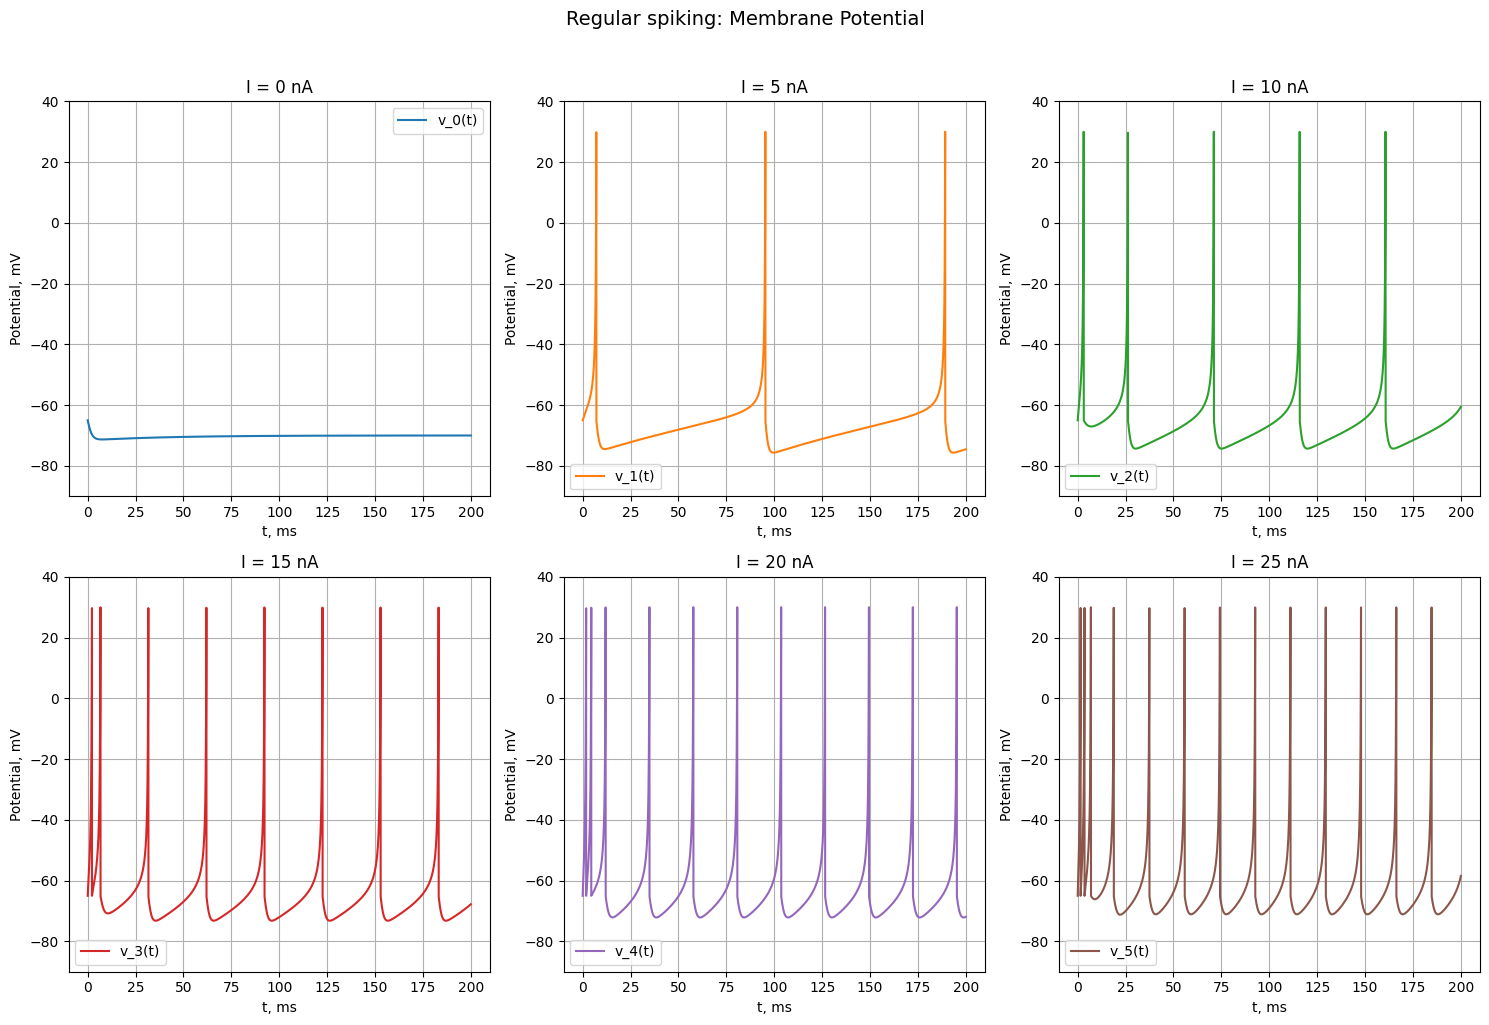

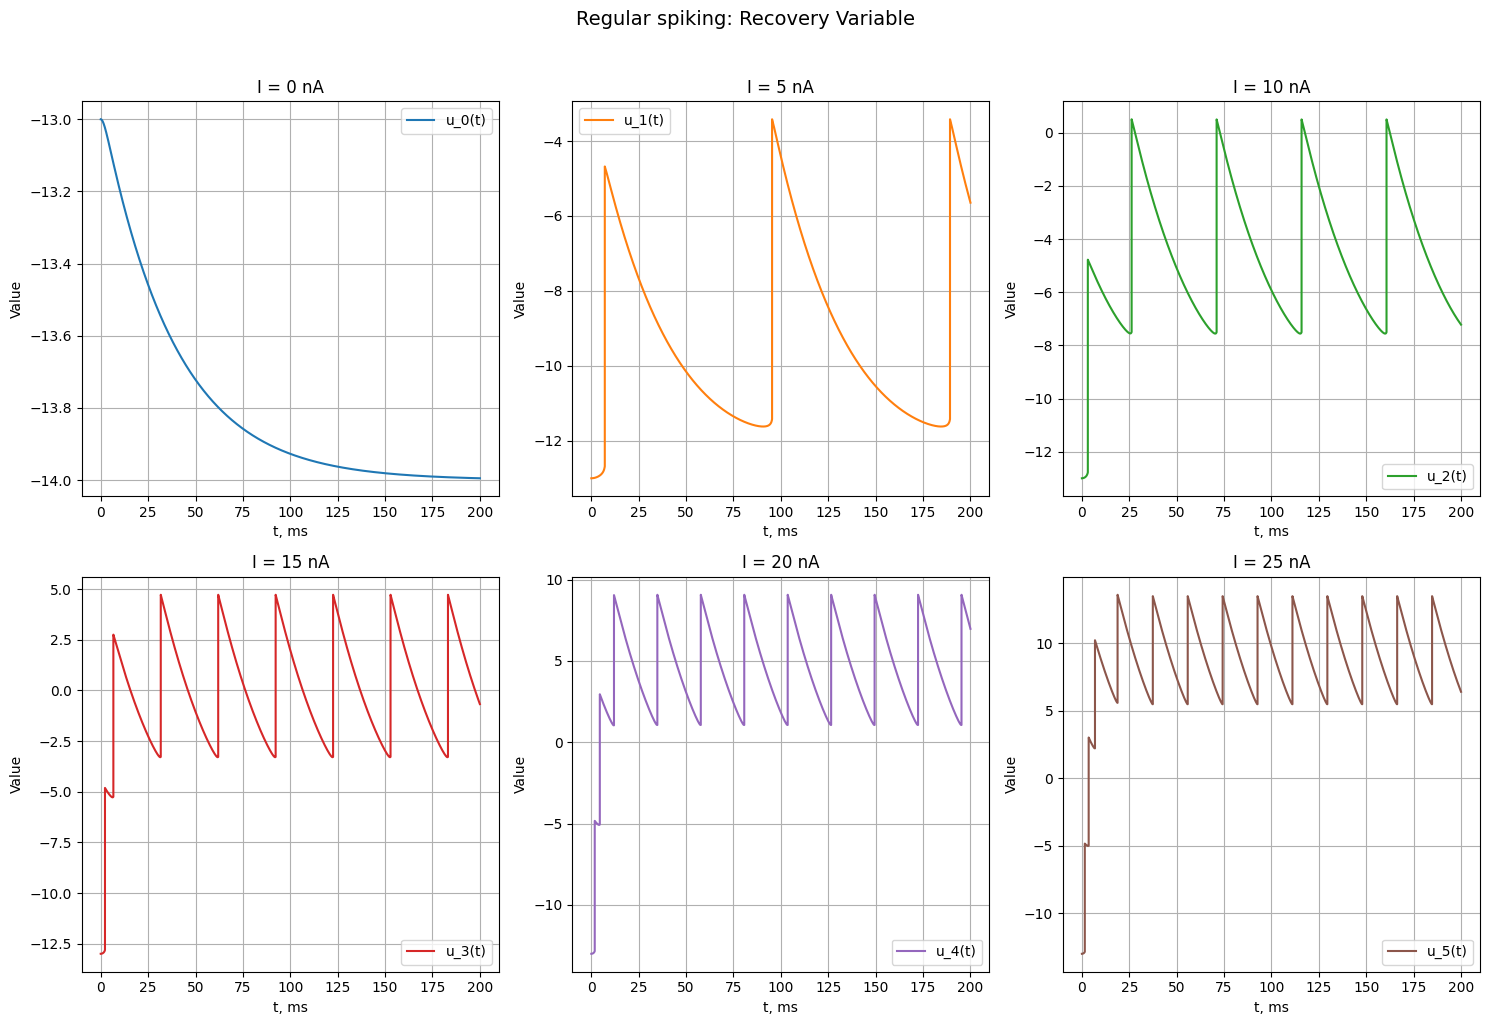

In [ ]:
I_values = [0, 5, 10, 15, 20, 25]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(15, 10))

for idx, I in enumerate(I_values):
    params = regular_spiking_params.copy()
    params['I'] = I
    params['tt'] = f'I = {I}'

    t, v, u = simulate_izhikevich(params)

    # График потенциала
    plt.subplot(2, 3, idx+1)
    plt.plot(t, v, color=colors[idx])
    plt.title(f'I = {I} nA')
    plt.xlabel('t, ms')
    plt.ylabel('Potential, mV')
    plt.legend([f'v_{idx}(t)'])
    plt.grid(True)
    plt.ylim(-90, 40)


plt.suptitle(f"{regular_spiking_params['tt']}: Membrane Potential", fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('rs_different_I_potentials.png', dpi=300, bbox_inches='tight')
from google.colab import files
files.download('rs_different_I_potentials.png')

# Отдельная фигура для переменной восстановления
plt.figure(figsize=(15, 10))

for idx, I in enumerate(I_values):
    params = regular_spiking_params.copy()
    params['I'] = I
    params['tt'] = f'I = {I}'

    t, v, u = simulate_izhikevich(params)

    # График восстановительной переменной
    plt.subplot(2, 3, idx+1)
    plt.plot(t, u, color=colors[idx])
    plt.title(f'I = {I} nA')
    plt.xlabel('t, ms')
    plt.ylabel('Value')
    plt.legend([f'u_{idx}(t)'])
    plt.grid(True)

plt.suptitle(f"{regular_spiking_params['tt']}: Recovery Variable", fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('rs_different_I_recovery.png', dpi=300, bbox_inches='tight')
files.download('rs_different_I_recovery.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

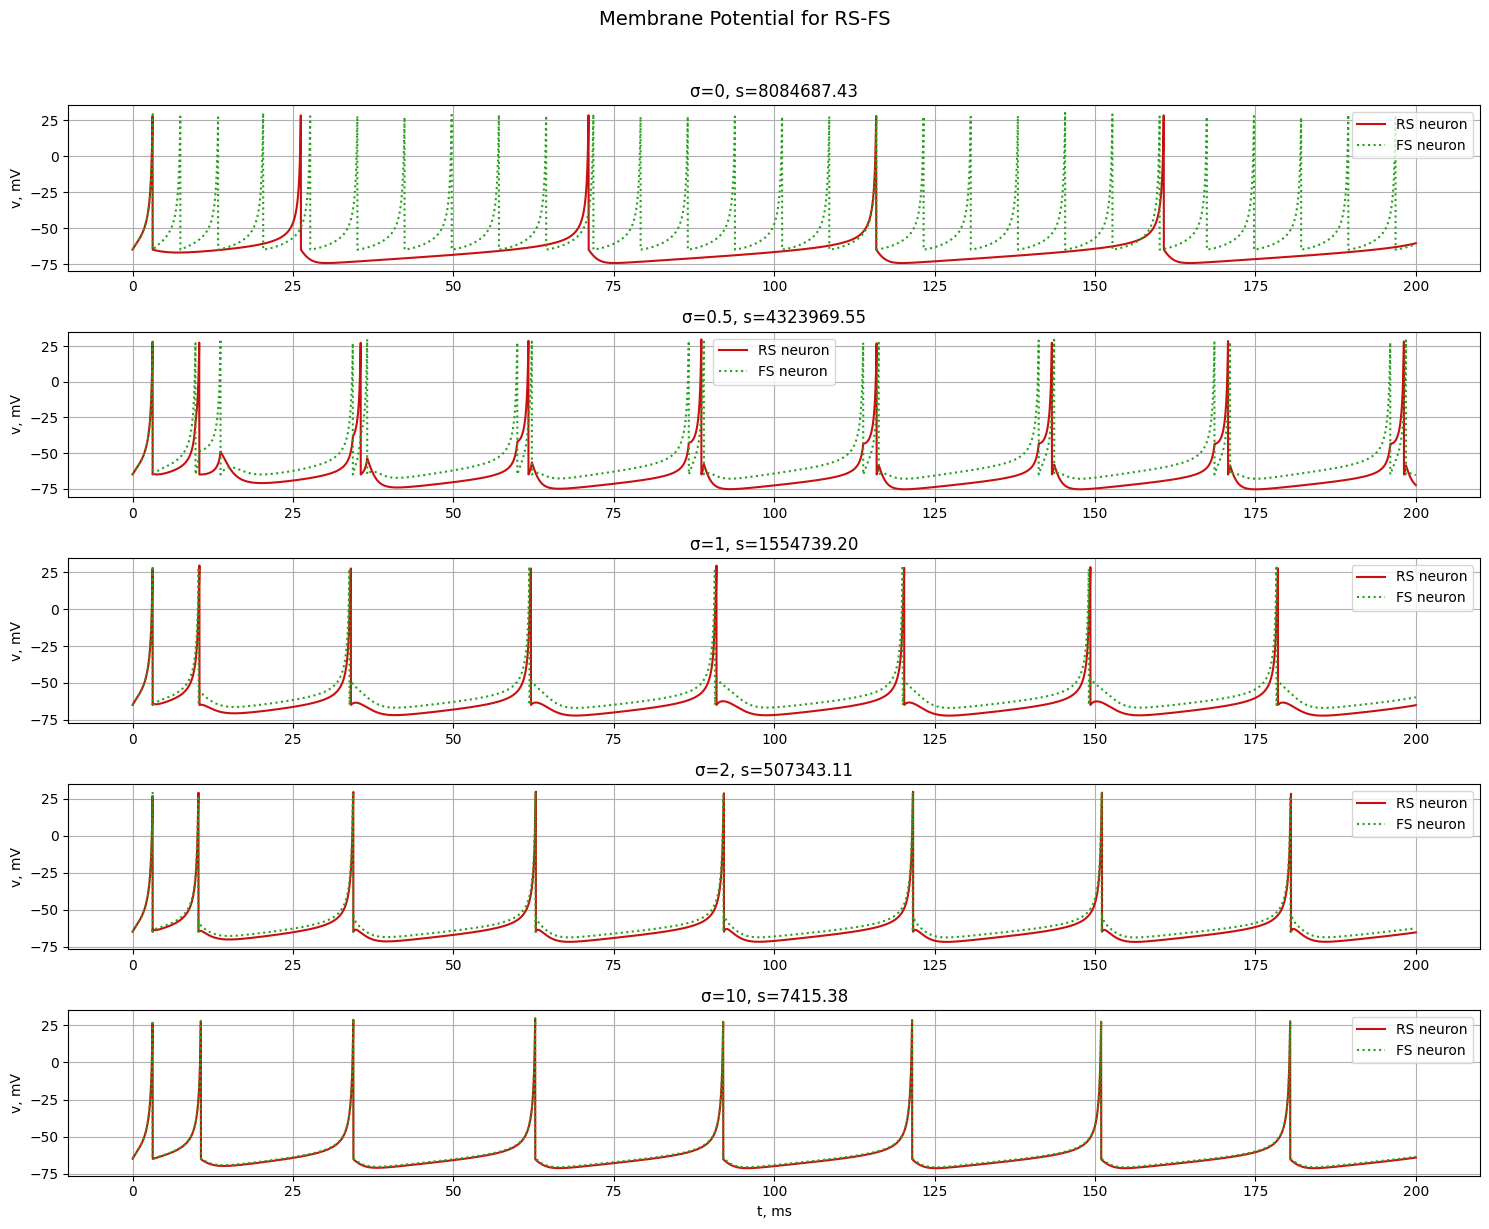

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

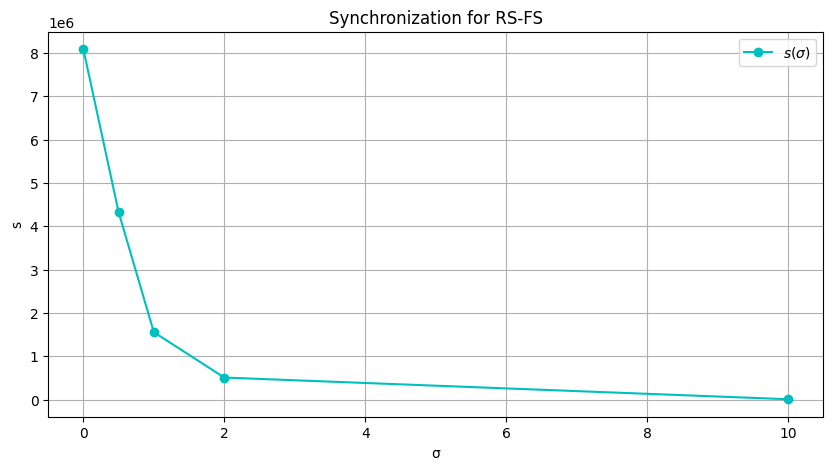

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from google.colab import files


rs_params = {
    'a': 0.02,
    'b': 0.2,
    'c': -65,
    'd': 8,
    'v0': -65,
    'I': 10
}

fs_params = {
    'a': 0.1,
    'b': 0.2,
    'c': -65,
    'd': 2,
    'v0': -65,
    'I': 10
}

sigmas = [0, 0.5, 1, 2, 10]

def izhikevich_model_net(state, t, a1, b1, I1, a2, b2, I2, sigma_):
    v1, u1, v2, u2 = state
    dv1dt = 0.04*v1**2 + 5*v1 + 140 - u1 + I1 + sigma_*(v2 - v1)
    du1dt = a1*(b1*v1 - u1)

    dv2dt = 0.04*v2**2 + 5*v2 + 140 - u2 + I2 + sigma_*(v1 - v2)
    du2dt = a2*(b2*v2 - u2)
    return [dv1dt, du1dt, dv2dt, du2dt]

def simulate_izhikevich_net(sigma_, t_max=200, dt=0.01):
    t = np.arange(0, t_max, dt)
    state = np.array([
        rs_params['v0'],
        rs_params['b'] * rs_params['v0'],
        fs_params['v0'],
        fs_params['b'] * fs_params['v0']
    ])

    v_rs = np.zeros_like(t)
    v_fs = np.zeros_like(t)

    for i in range(len(t)):
        new_state = odeint(
            izhikevich_model_net,
            state,
            [0, dt],
            args=(
                rs_params['a'], rs_params['b'], rs_params['I'],
                fs_params['a'], fs_params['b'], fs_params['I'],
                sigma_
            )
        )[-1]


        if new_state[0] >= 30:
            new_state[0] = rs_params['c']
            new_state[1] += rs_params['d']
        if new_state[2] >= 30:
            new_state[2] = fs_params['c']
            new_state[3] += fs_params['d']

        v_rs[i], v_fs[i] = new_state[0], new_state[2]
        state = new_state

    return t, v_rs, v_fs


def sync_level(v1, v2):
    return sum((v1 - v2)**2)

DARK_RED = '#c91010'
DARK_GREEN = '#23a118'

plt.figure(figsize=(15, 12))

for i, sigma_ in enumerate(sigmas):
    t, v_rs, v_fs = simulate_izhikevich_net(sigma_)
    sync = sync_level(v_rs, v_fs)

    plt.subplot(len(sigmas), 1, i+1)
    plt.plot(t, v_rs, color=DARK_RED, label='RS neuron')
    plt.plot(t, v_fs, color=DARK_GREEN, label='FS neuron',  linestyle=':')
    plt.title(f'σ={sigma_}, s={sync:.2f}')
    plt.ylabel('v, mV')
    plt.legend()
    plt.grid(True)
    plt.yticks([-75, -50, -25, 0, 25])

plt.xlabel('t, ms')
plt.suptitle(f"Membrane Potential for RS-FS", fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('v_rsfs.png', dpi=300, bbox_inches='tight')
files.download('v_rsfs.png')
plt.show()


sync_values = [sync_level(*simulate_izhikevich_net(sigma_)[1:]) for sigma_ in sigmas]

plt.figure(figsize=(10, 5))
plt.plot(sigmas, sync_values, 'co-', label=r'$s(\sigma)$')
plt.legend()
plt.xlabel('σ')
plt.ylabel('s')
plt.title('Synchronization for RS-FS')
plt.grid(True)
plt.savefig('sync.png', dpi=300, bbox_inches='tight')
files.download('sync.png')
plt.show()